IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME 5 : Validation croisée (fin), astuce du noyau, réduction de dimensionnalité: visualisation & débruitage. 

<font size="+1" color="RED"><b>[Q]</b></font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

28707636 Warintara MUNSUP
21300810 Snkar Mam 

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-05</tt> et rajouter à la suite de <tt>tme-05</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-05-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

In [2]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev



# Bilan des séances précédentes

<div class="alert alert-block alert-warning">
Avant de commencer ce sujet, vous devez avoir terminé les TME précédents:

1. les fonctions pour générer des datasets uniformes, gaussiens et XOR.
2. les classifieurs: ClassifierKNN, ClassifierLineaireRandom, ClassifierPerceptron, ClassifierPerceptronBiais
3. le classifieur multiclasses ClassifierMultiOOA    
4. les fonctions de validation croisée: crossval, crossval_strat et analyse_perfs
5. toutes les fonctions et classes doivent avoir été testées et validées, et recopiées dans les fichiers correspondants:
    - utils.py pour les fonctions 1) 
    - Classifiers.py pour les fonctions 2) et 3) 
    - evaluations.py pour les fonctions 4)

Si vous n'avez pas terminé un de ces points, consacrez le début de ce TME 5 à vous mettre à jour.
</div>    

## Une fonction pour la validation croisée

Reprendre le code écrit dans le TME 4 pour évaluer par validation croisée le perceptron biais.

**Remarque**: penser à mettre dans le sous-répertoire `ressources` un lien vers `usps.pkl` (cf. séances précédentes).

In [3]:


# test sur les données USPS
import pickle as pkl

data = pkl.load(open('ressources/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)

# Création d'un sous groupe de données
c1 = 2  # ---> sera associée au label +1  
c2 = 6  # ---> sera associée au label -1
X12 = Xu[(Yu==c1) | (Yu==c2)]
Y12 = np.where(Yu[(Yu==c1) | (Yu==c2)]==c1, 1, -1)

np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = X12.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10
# Liste pour stocker les taux de bonne classification à chaque itération
perf = []

print("Performances avec les classes ", c1," et ", c2)
# 1) mélanger des exemples 
index = np.random.permutation(len(X12)) # mélange des index
Xm12 = X12[index]
Ym12 = Y12[index]

# 2) réaliser une validation croisée complète 
for i in range(nb_iter) :
    Xapp,Yapp,Xtest,Ytest = ev.crossval(Xm12, Ym12, nb_iter, i)
    perceptron5 = classif.ClassifierPerceptronBiais(dim, eps, poids_0)
    perceptron5.train(Xapp, Yapp)
    perf.append(perceptron5.accuracy(Xtest, Ytest))
    print("Itération ",i," : taille base app. = ",Xapp.shape[0]," taille base test= ", Xtest.shape[0]," Taux de bonne classif:  ",perf[i] )
# ###########################
    
taux_moyen, taux_ecart = ev.analyse_perfs(perf)
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

Performances avec les classes  2  et  6
Itération  0  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.9745762711864406
Itération  1  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.9915254237288136
Itération  2  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.9915254237288136
Itération  3  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.9745762711864406
Itération  4  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.9830508474576272
Itération  5  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   1.0
Itération  6  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.9491525423728814
Itération  7  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.9745762711864406
Itération  8  : taille base app. =  1073  taille base test=  118  Taux de bonne classif:   0.99

<font color="RED" size="+1"><b>[Q]</b></font> À partir de maintenant, on évaluera souvent les classifieurs en utilisant une validation croisée, pour faciliter cela, écrire la fonction `validation_croisee` qui prend en argument un nom de classe de classifieur, un tuple composé d'un dataset et de son ensemble de labels, et un entier naturel donnant le nombre d'itérations à réaliser. Cette fonction rend un triplet contenant la liste des performances obtenues, la performance moyenne set l'écart type.

Cette fonction doit réaliser le traitement que vous avez implémenté dans la boîte précédente et qui débute **après le mélange des exemples**, c'est-à-dire que cette fonction implémente l'étape 2) de la boîte précédente.


<font color="RED"><b>Attention !</b></font>: lors de la validation croisée, vous devrez dupliquer le classifieur afin qu'il soit ré-entrainé complètement depuis son état initial à chaque tour. Pour cela, vous utiliserez la commande `copy.deepcopy` qui permet d'obtenir une copie complète de l'objet classifieur.

In [4]:
import copy  # pour deepcopy()

def validation_croisee(C, DS, nb_iter):
    """ Classifieur * tuple[array, array] * int -> tuple[ list[float], float, float]
    renvoie la liste des performances obtenus, la perfpormance moyenne et l'écart type 
    """
    for i in range(nb_iter) : 
        Xapp,Yapp, Xtest,Ytest = ev.crossval(DS[0],DS[1],nb_iter, i)
        C.train(Xapp,Yapp)
        perf.append(C.accuracy(Xtest,Ytest))
    taux_moyen, taux_ecart = ev.analyse_perfs(perf)
    return (perf,taux_moyen,taux_ecart)
    


In [5]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = X12.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

print("Performances avec les classes ",c1," et ", c2)

# Création du classifieur que l'on veut évaluer:
cl = classif.ClassifierPerceptronBiais(dim, eps, poids_0)

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = validation_croisee(cl, (X12, Y12), nb_iter)

# ########################
print("------ affichage validation croisée (optionnel)")
for i in range(nb_iter) :
    print("Itération ",i," : taille base app. = ",Xapp.shape[0]," taille base test= ", Xtest.shape[0]," Taux de bonne classif:  ",perf[i] )
print("------ fin affichage validation croisée")
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

Performances avec les classes  2  et  6
------ affichage validation croisée (optionnel)
Itération  0  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   0.9745762711864406
Itération  1  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   0.9915254237288136
Itération  2  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   0.9915254237288136
Itération  3  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   0.9745762711864406
Itération  4  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   0.9830508474576272
Itération  5  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   1.0
Itération  6  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   0.9491525423728814
Itération  7  : taille base app. =  1072  taille base test=  119  Taux de bonne classif:   0.9745762711864406
Itération  8  : taille base app. =  1072  taill

<div class="alert alert-block alert-success">

À partir d'ici, on considére que votre fonction  `validation_croisee` est opérationnelle et qu'elle a été ajoutée dans le fichier `evaluation.py` de la librairie `iads`.

</class>

Appel de la fonction `validation_croisee` une fois mise dans la librairie `iads`:

In [6]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = X12.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

print("Performances avec les classes ",c1," et ", c2)

# Création du classifieur que l'on veut évaluer:
cl = classif.ClassifierPerceptronBiais(dim, eps, poids_0)

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (X12, Y12), nb_iter)

# ######################## 
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

Performances avec les classes  2  et  6
Analyse perf: moyenne: 0.9958	ecart: 0.0102


### Validation croisée sur un classifieur multi-classes


<font color="RED" size="+1"><b>[Q]</b></font> Tester le classifieur multiclasse du TME 4, basé sur un classifieur perceptron biais, avec l'ensemble des données usps.


In [7]:
import copy
import numpy as np



In [8]:
import time # pour chronométrer...

np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = Xu.shape[1]   # la dimension est donnée par le nombre de colonnes de Xu
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 3

print("Performances avec toutes les classes (ATTENTION: cela peut être long !)")

# ######################## A COMPLETER CI-DESSOUS

cl = classif.ClassifierMultiOAA(classif.ClassifierPerceptronBiais(dim, 1e-3, True))

# ######################## 

# Remarque: ici, on ne mélange pas les exemples avant la validation croisée

# Evaluation du classifieur par validation croisée:
tic = time.time()  # On lance le chrono
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (Xu, Yu), nb_iter)
toc = time.time()  # On arrête le chrono

print(f'Temps passe: {(toc-tic):0.4f} secondes.')
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')



Performances avec toutes les classes (ATTENTION: cela peut être long !)
Temps passe: 35.2442 secondes.
Analyse perf: moyenne: 0.9268	ecart: 0.0044


# Retour sur le XOR

Dans le TME 3, vous avez implémenté la fonction `create_XOR` qui permet de générer des données avec une distribution des classes très difficile à apprendre avec nos classifieurs linéaires.

Par exemple, on peut générer 400 exemples répartis équitablement en 2 classes.

(label -1: o_rouge; label +1: x_bleu)
Nombre total d'exemples générés:  400
Nombre d'exemples de classe +1:  200
Nombre d'exemples de classe -1:  200


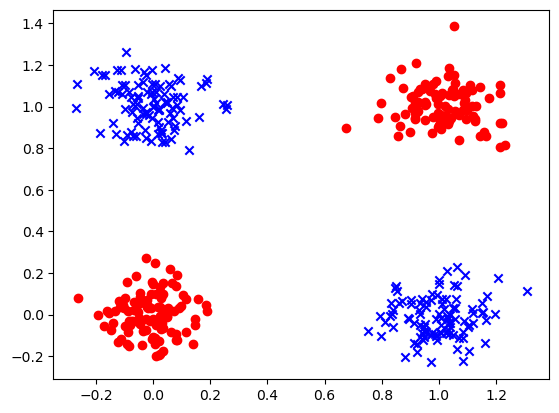

In [9]:
# Retour sur le XOR avec la fonction du TME 3 (mise dans votre librairie)

np.random.seed(42)   # on prend 42 comme graine

# Génération d'un dataset avec 400 exemples (100 par région du XOR):
data_xor, label_xor = ut.create_XOR(100,0.01)
ut.plot2DSet(data_xor, label_xor)
print("(label -1: o_rouge; label +1: x_bleu)")
print("Nombre total d'exemples générés: ",data_xor.shape[0])
print("Nombre d'exemples de classe +1: ",data_xor[label_xor==+1].shape[0])
print("Nombre d'exemples de classe -1: ",data_xor[label_xor==-1].shape[0])

In [10]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = data_xor.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

# Création du classifieur que l'on veut évaluer:
cl = classif.ClassifierPerceptron(dim, eps, poids_0)

# Remarque: on ne mélange pas les exemples avant la validation croisée car ils sont déjà dans un ordre aléatoire

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (data_xor, label_xor), nb_iter)

# ######################## 
Xapp,Yapp, Xtest,Ytest = ev.crossval(data_xor,label_xor,nb_iter, i)
print("------ affichage validation croisée (optionnel)")
for i in range(nb_iter) :
    print("Itération ",i," : taille base app. = ",Xapp.shape[0]," taille base test= ", Xtest.shape[0]," Taux de bonne classif:  ",perf[i] )
print("------ fin affichage validation croisée")
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

------ affichage validation croisée (optionnel)
Itération  0  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.41025641025641024
Itération  1  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.5641025641025641
Itération  2  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.23076923076923078
Itération  3  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.0
Itération  4  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.0
Itération  5  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.0
Itération  6  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.0
Itération  7  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.48717948717948717
Itération  8  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   1.0
Itération  9  : taille base app. =  361  taille base

Les résultats précédents ne sont vraiment pas très bons, le perceptron n'arrive pas à séparer correctement les 2 classes... (expliquer pourquoi)


## L'asture du noyau (*Kernel Trick*)

<div class="alert alert-block alert-info">

Comme vu en cours, l'**astuce du noyau ("kernel trick")** est un moyen pour améliorer ses performances.

Un **noyau** est une **fonction** (on parle de *fonction noyau*, *noyau* ou *kernel*) qui permet de représenter des données d'un espace donné dans un autre espace, souvent de dimension plus grande.

Par exemple, on considère une matrice en 2D d'observations:
$$X =\left[
    \begin{array}{cc}
    x_{11} & x_{12}\\
    \vdots & \vdots \\
    x_{N1} & x_{N2}\\
    \end{array}
    \right]\in \mathbb R^{N\times 2}$$

La fonction produite par un perceptron, $f(\mathbf x) = \mathbf w \cdot \mathbf x$, correspond à une frontière linéaire dans l'espace 2D... Qui passe par $(0,0)$.

Mais supposons que nous ajoutons des colonnes à $X$:
$$X^* =\left[
    \begin{array}{cccccc}
    x_{11} & x_{12} & x_{11}^2 & x_{12}^2 & x_{11} x_{12} & 1 \\
    \vdots & \ddots &&&&\vdots\\
    x_{N1} & x{N2} & x_{N1}^2 & x_{N2}^2 & x_{N1} x_{N2} & 1 \\
    \end{array}
    \right]\in \mathbb R^{N\times 6}$$

Les colonnes ajoutées sont obtenues à partir des colonnes initiales de $X$.

Maintenant, la fonction $f(\mathbf x^*) = \mathbf w \cdot \mathbf x^*$ correspond toujours à une frontière linéaire mais cette fois-ci dans un espace 6D... 
Mais sa projection dans l'espace 2D d'origine est une frontière non linéaire !


Un **noyau**  est donc une fonction de transformation
$$\begin{array}{cccc}
    K:& X & \rightarrow & X^*\\
      & \mathbf x & \mapsto &\mathbf x^*
\end{array}$$

</div>

**Note** Il faudra être très attentif, on fait tous les calculs avec des $\mathbf x^*$ mais on fait tous les affichages avec des $\mathbf x$...

Pour représenter des noyaux, on définit une classe abstraite `Kernel` qui sera étendue pour chaque noyau que l'on souhaitera créer.

In [11]:
# CLasse (abstraite) pour représenter des noyaux
class Kernel():
    """ Classe pour représenter des fonctions noyau
    """
    def __init__(self, dim_in, dim_out):
        """ Constructeur de Kernel
            Argument:
                - dim_in : dimension de l'espace de départ (entrée du noyau)
                - dim_out: dimension de l'espace de d'arrivée (sortie du noyau)
        """
        self.input_dim = dim_in
        self.output_dim = dim_out
        
    def get_input_dim(self):
        """ rend la dimension de l'espace de départ
        """
        return self.input_dim

    def get_output_dim(self):
        """ rend la dimension de l'espace d'arrivée
        """
        return self.output_dim
    
    def transform(self, V):
        """ ndarray -> ndarray
            fonction pour transformer V dans le nouvel espace de représentation
        """        
        raise NotImplementedError("Please Implement this method")


L'intérêt de définir une telle classe `Kernel` pour définir des noyaux est qu'elle permettra de définir des algorithmes de façon générique qui pourront alors prendre des noyaux quelconques en argument.

### Un premier noyau

Le premier noyau, très simple, que l'on définit permet de projeter (manuellement) des données 2D dans un espace de plus grande dimension. 

Voici un exemple de projection qui transforme le vecteur $(x_1,x_2)$ en vecteur $(x_1,x_2,1)$

In [12]:
class KernelBias(Kernel):
    """ Classe pour un noyau simple 2D -> 3D
    """
    def __init__(self):
        """ Constructeur de KernelBias
            pas d'argument, les dimensions sont figées
        """
        # Appel du constructeur de la classe mère
        super().__init__(2,3)
        
    def transform(self, V):
        """ ndarray de dim 2 -> ndarray de dim 3            
            rajoute une 3e dimension au vecteur donné
        """
        
        if (V.ndim == 1): # on regarde si c'est un vecteur ou une matrice
            W = np.array([V]) # conversion en matrice
            V_proj = np.append(W,np.ones((len(W),1)),axis=1)
            V_proj = V_proj[0]  # on rend quelque chose de la même dimension
        else:
            V_proj = np.append(V,np.ones((len(V),1)),axis=1)
            
        return V_proj
        

In [13]:
# Exemple d'utilisation : 
kb = KernelBias()

data_xor_bias= kb.transform(data_xor)
print(data_xor.shape)
print(data_xor_bias.shape)
data_xor_bias

(400, 2)
(400, 3)


array([[ 0.04967142, -0.01382643,  1.        ],
       [ 0.06476885,  0.15230299,  1.        ],
       [-0.02341534, -0.0234137 ,  1.        ],
       ...,
       [-0.10810565,  1.10531529,  1.        ],
       [-0.00395552,  1.06815007,  1.        ],
       [ 0.00283184,  1.00297561,  1.        ]])

### Un noyau un peu plus compliqué

<font color="RED" size="+1">**[Q]**</font> Définir la classe `KernelPoly` permettant de représenter le noyau : $(x_1,x_2) \mapsto (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. 

In [14]:
# ------------------------ A COMPLETER :

class KernelPoly(Kernel):
    def __init__(self):
        """ Constructeur de KernelPoly
            pas d'argument, les dimensions sont figées
        """
        # Appel du constructeur de la classe mère
        super().__init__(2,6)
        
    def transform(self,V):
        """ ndarray de dim 2 -> ndarray de dim 6            
            ...
        """
        if V.ndim == 1:  
            V = np.array([V])  # Conversion en matrice
        
        x1 = V[:, 0]
        x2 = V[:, 1]
        x1_square = x1 * x1
        x2_square = x2 * x2
        x1_x2 = x1 * x2
        
        return np.column_stack((np.ones_like(x1), x1, x2, x1_square, x2_square, x1_x2))



In [15]:
# Exemple d'utilisation 

kp = KernelPoly()

data_xor_poly = kp.transform(data_xor[0:4])

print(data_xor_poly)
print(data_xor_poly.shape)


[[ 1.00000000e+00  4.96714153e-02 -1.38264301e-02  2.46724950e-03
   1.91170170e-04 -6.86778352e-04]
 [ 1.00000000e+00  6.47688538e-02  1.52302986e-01  4.19500442e-03
   2.31961994e-02  9.86448981e-03]
 [ 1.00000000e+00 -2.34153375e-02 -2.34136957e-02  5.48278029e-04
   5.48201146e-04  5.48239586e-04]
 [ 1.00000000e+00  1.57921282e-01  7.67434729e-02  2.49391312e-02
   5.88956064e-03  1.21194276e-02]]
(4, 6)


<font color="RED" size="+1">**[Q]**</font> Implémenter la classe `ClassifierPerceptronKernel` qui étend la classe `Classifier`. 
Pour définir cette classe possède les mêmes fonctionnalités que celles de la classe `ClassifierPerceptron`, en plus, elle prend en argument, lors de sa construction, un noyau (instance de la classe `Kernel`).
Une différence majeure avec le perceptron normal, et que le dataset fourni pour les méthodes `train_step` et `train`, ainsi que l'exemple donnée pour une prédiction, doit être *kernélisé* avant d'appliquer le traitement.

*Remarques :*
- le données sont donc kernélisée dans l'objet `ClassifierPerceptronKernel`.
- toutes les méthodes de la classe `ClassifierPerceptronKernel` ne sont pas nécessairement à réécrire dans `ClassifierPerceptron`, seulement celles qui sont impactées par le changement apporté par l'utilisation du kernel..
 


In [46]:
# ------------------------ A COMPLETER :
class ClassifierPerceptronKernel(classif.ClassifierPerceptron):
    """ Perceptron de Rosenblatt kernelisé
    """
    def __init__(self, input_dimension, learning_rate, noyau, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (espace originel)
                - learning_rate : epsilon
                - noyau : Kernel à utiliser
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        super().__init__(input_dimension, learning_rate, init)
        self.noyau = noyau
        self.input_dimension = noyau.get_input_dim()
        self.output_dimension = noyau.get_output_dim()
        self.weight = np.zeros(self.noyau.get_output_dim()) if init == 0 else np.random.rand(self.noyau.get_output_dim()) * 0.01
        self.allw = [self.w.copy()]
        self.learning_rate = learning_rate
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments: (dans l'espace originel)
                - desc_set (ndarray): ndarray avec des descriptions
                - label_set (ndarray): ndarray avec les labels correspondants
        """        
        indexes = np.arange(desc_set.shape[0])
        np.random.shuffle(indexes)
        for i in indexes:
            x = self.noyau.transform(desc_set[i])

            y = label_set[i]
            if y * self.score(desc_set[i]) != label_set[i]:
                self.allw.append(self.weight)
                self.weight = self.weight + self.learning_rate * (label_set[i] - self.score(x[0]))*(x[0]) 
            
     
    def score(self, x):
        """ Rend le score de prédiction sur x 
            x: une description (dans l'espace originel)
        """
        v = self.noyau.transform(x)
        return np.dot(self.weight, v[0])
    


<font color="RED" size="+1">**[Q]**</font> Entraîner un perceptron kernelisé utilisant un `KernelPoly` sur un dataset correspondant au XOR. Que constate-t-on ? Expliquer.

Accuracy :  0.75
(label -1: o_rouge; label +1: x_bleu)


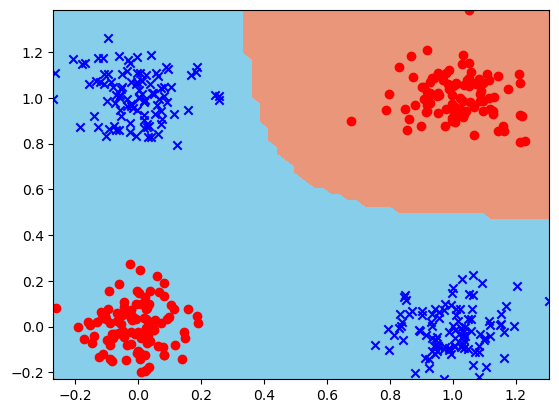

In [47]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Paramètres pour le perceptron:
dim = data_xor.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# ------------------------ A COMPLETER :

kp = KernelPoly()
ckp = ClassifierPerceptronKernel(dim,eps,kp,poids_0)


ckp.train(data_xor, label_xor)
print("Accuracy : ", ckp.accuracy(data_xor,label_xor))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(data_xor,label_xor,ckp,step=60)
ut.plot2DSet(data_xor,label_xor)
print("(label -1: o_rouge; label +1: x_bleu)")

On peut évaluer les résultats d'une validation croisée avec ce kernel.

In [48]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = data_xor.shape[1]   # la dimension est donnée par le nombre de colonnes de X12
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

# Création du classifieur que l'on veut évaluer:
cl = ClassifierPerceptronKernel(dim,eps,kp,poids_0)

# Remarque: on ne mélange pas les exemples avant la validation croisée car ils sont déjà dans un ordre aléatoire

# Evaluation du classifieur par validation croisée:
perf, taux_moyen, taux_ecart = ev.validation_croisee(cl, (data_xor, label_xor), nb_iter)

# ######################## 
Xapp,Yapp, Xtest,Ytest = ev.crossval(data_xor,label_xor,nb_iter, i)
print("------ affichage validation croisée (optionnel)")
for i in range(nb_iter) :
    print("Itération ",i," : taille base app. = ",Xapp.shape[0]," taille base test= ", Xtest.shape[0]," Taux de bonne classif:  ",perf[i] )
print("------ fin affichage validation croisée")
print(f'Analyse perf: moyenne: {taux_moyen:0.4f}\tecart: {taux_ecart:0.4f}')

------ affichage validation croisée (optionnel)
Itération  0  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.0
Itération  1  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.0
Itération  2  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.48717948717948717
Itération  3  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.8461538461538461
Itération  4  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.5641025641025641
Itération  5  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   1.0
Itération  6  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   1.0
Itération  7  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.6410256410256411
Itération  8  : taille base app. =  361  taille base test=  39  Taux de bonne classif:   0.07692307692307693
Itération  9  : taille base app. =  36

# Visualisation de données

Nous proposons une série d'expériences pour appréhender la visualisation de données et la réduction de la dimensionnalité:

1. Comprendre la signification des valeurs propres et vecteurs propres sur les données gaussiennes sur lesquelles nous avons travaillé jusqu'ici
1. Générer un jeu de données jouet en 3D puis réduire la dimensionnalité
1. Appliquer cette réduction de dimension sur les données USPS

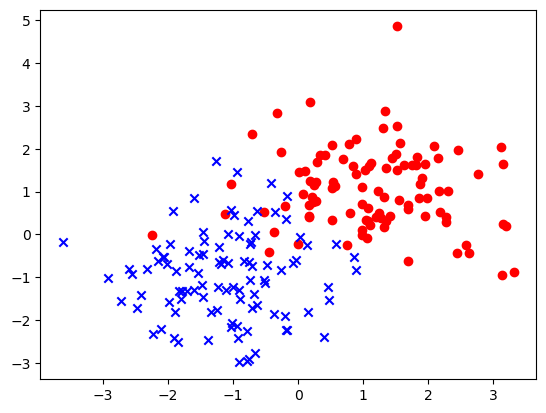

In [49]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-1,-1],[[1,0],[0,1]], [1, 1],[[1,0],[0,1]],N)

ut.plot2DSet(X,Y)

<font color="RED" size="+1"><b>[Q]</b></font> Avant de poursuivre, répondez aux questions suivantes:
- Combien y a-t-il de vecteurs propres et de valeurs propres dans ce problème?
- Quel axe de plus forte variance est pressenti?

Réponses:


[ la matrice de covariance sera de taille 2x2. Cette matrice aura donc 2 valeurs propres et 2 vecteurs propres correspondants. Les valeurs propres indiquent la variance le long des axes des vecteurs propres, et les vecteurs propres indiquent les directions de ces axes.]



Vérifions maintenant avec du code.
L'idée est d'appliquer la fonction de la librairie Numpy: ```linalg.eig``` sur la matrice de correlation $X^T X$ et d'afficher les sorties pour les comprendre.

In [50]:
# Avant cela : 
# petit rappel sur les matrices:
M = np.array([[1,2,3],[4,5,6], [1, 0, 0]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [1, 0, 0]])

In [51]:
# Transposée de M:
M.T

array([[1, 4, 1],
       [2, 5, 0],
       [3, 6, 0]])

In [52]:
# Produit de matrices:
M.T @ M

array([[18, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

<font color="RED" size="+1"><b>[Q]</b></font> Refaire les calculs précédents à la main, sur une feuille !

In [67]:
# Donner les instructions pour récupérer les valeurs propres et vecteurs propres de la 
# matrice X générée précédeemment, puis les afficher:


# Décommentez et compléter la ligne suivante: 

lam, V = np.linalg.eig(M)

# ###################################

print("1er valeur rendue:\n", lam)
print("2e valeur rendue :\n", V)

1er valeur rendue:
 [ 6.81573612 -1.1866583   0.37092218]
2e valeur rendue :
 [[-0.3482453  -0.75825177  0.19151266]
 [-0.93600993 -0.12945231 -0.8347106 ]
 [-0.05109431  0.63898072  0.51631494]]


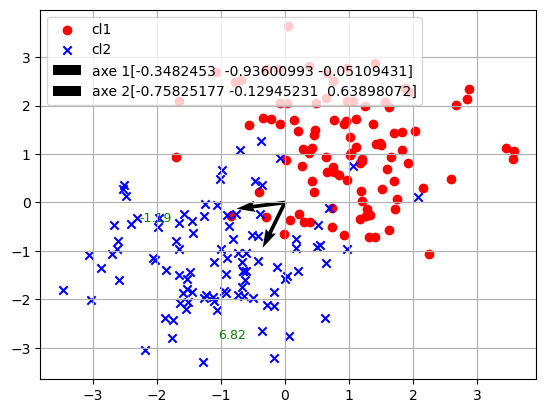

In [81]:
# tracer les vecteurs propres, à partir de (0,0) sur le scatter des points (X,Y)
# A l'aide de la commande plt.text, vous pouvez rajouter la "force" des axes si vous voulez

plt.figure()
plt.grid('on')
# Affichage de l'ensemble des exemples :
plt.scatter(X[Y==-1,0],X[Y==-1,1],marker='o', color="red") # 'o' rouge pour la classe -1
plt.scatter(X[Y==1,0],X[Y==1,1],marker='x', color="blue") # 'x' bleu pour la classe +1
# A COMPLETER 

for i in range(2):  
    plt.quiver(0, 0, V[0, i], V[1, i], angles='xy', scale_units='xy', scale=1, color=['black'])
    plt.text(V[0, i]*3, V[1, i]*3, f'{lam[i]:.2f}', fontsize=9, color='green')



# Décommenter la ligne suivante pour avoir la légende :
plt.legend(["cl1", "cl2","axe 1"+str(V[:,0]),"axe 2"+str(V[:,1])])


# Si vous voulez sauvegarder l'image : 
#plt.savefig("out/acp.png",bbox_inches='tight', transparent=True,pad_inches=0)



On voit bien la principale direction de variance (associée à la plus grande valeur propre)

## Réduction de données 2D => 1D

Dans une logique de réduction de dimensionnalité, on souhaite:
1. extraire automatiquement le vecteur propre associé à la plus grande valeur propre
1. projeter les données sur cet axe
1. afficher le plot 1D des données suivant:
    - x = nouvelle coordonée (unique) du point
    - y = étiquette

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

<font color="RED" size="+1"><b>[Q]</b></font> Donner les instructions qui réalisent les 3 étapes données ci-dessus.


In [ ]:
import math

plt.figure()

# A COMPLETER 

# .... ICI

# ###################################
plt.grid()

#plt.savefig("out/proj_1D.png",bbox_inches='tight', transparent=True,pad_inches=0)


Vous devez obtenir:

(si l'image ne s'affiche pas, aller la voir dans le répertoire `ressources/`, c'est l'image `proj_1D.png`.

<table border="0">
 <tr>
    <td><img src="ressources/proj_1D.png" width=300px></td>
    <td>L'axe de plus forte variance semble bien intéressant pour distinguer les deux classes de données</td>
 </tr>
</table>

Pour mieux comprendre ce qui se passe, je vous propose la figure explicative suivante qui illustre ce que vous avez fait du point de vue géométrique:
<img src="ressources/proj_2D.png" width=300px>


(si l'image ne s'affiche pas, aller la voir dans le répertoire `ressources/`, c'est l'image `proj_2D.png`.

**Note:** cette dernière figure est non-triviale à obtenir, il ne faut pas perdre du temps en TP à chercher comment faire :)

## Réduction de données d-D => 2D

Passons maintenant sur les données USPS pour essayer de reproduire les figures du cours 5.

In [ ]:
# Import de pickle pour récupérer les données
import pickle as pkl

# Chargement des données USPS :

# **** IMPORTANT ****
# faire un lien vers le fichier usps.pkl qui a été fournie dans les TME précédents (répertoire ressources)
# dans un sous-répertoire ressources du répertoire où se trouve ce notebook.
# Ou bien : modifier dans open() pour mettre le bon chemin d'accès vers usps.pkl sur votre compte.

data = pkl.load(open('ressources/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)
XTu = np.array(data['X_test'], dtype=float) # conversion de type pour une meilleure compatibilité
YTu = np.array(data['Y_test'], dtype=float)


<font color="RED" size="+1"><b>[Q]</b></font> Donner les instructions qui réalisent les 3 étapes suivantes:

1. Extraire automatiquement les 2 vecteurs propres associés aux 2 plus grandes valeurs propres sur les données USPS
1. Projeter les données sur ces axes
    - projeter toutes les données
    - projeter seulement les 200 premières images (pour mieux voir)
1. Afficher avec un code couleur correspondant aux classes

Cet affichage va nous permettre de comprendre ce que nous venons de faire.

In [ ]:
# A réaliser :

# 1) calcul des vecteurs propres


# 2) affichage (print)


# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 


# 4) affichage (plot) avec un code couleur pour les classes





# ####################################
plt.legend(np.arange(10))

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)



Vous devez obtenir:
<table border="0">
 <tr>
    <td><img src="ressources/proj_usps_all.png"></td>
 </tr>
</table>

(si l'image ne s'affiche pas, aller la voir dans le répertoire `ressources/`, c'est l'image `proj_usps_all.png`.

On a l'impression que les 0 et 1 sont bien séparés des autres classes... Le reste est un peu confus mais on voit que:
- les 8 et les 9 se ressemblent
- les 6 et les 3 dans une moindre mesure
- les 7 et les 4 un peu aussi
- les 2 sont en plein milieu

## Interprétation des vecteurs propres

Chacun de nos 2 axes contient beaucoup d'informations... Mais lesquelles?
Ces axes sont en 256 dimensions, il est possible de les tracer comme une image. L'idée est de distinguer les dimensions positives et les dimensions négatives.
On ne va pas reconstruire une échelle de couleur propre... Mais on peut a minima afficher l'échelle.

Le code est fourni ci-dessous.

<table border="0">
 <tr>
    <td><img src="ressources/vp_0.png"></td>
    <td><img src="ressources/vp_1.png"></td>
 </tr>
</table>

Le premier axe est sensible aux pixels allumés en haut et en bas: sur le premier axe de la figure de la boite précédente, on remarque que les chiffres les plus à droite sont le 0 et le 3... Ca colle.

Le second axe est sensible aux pixels à gauche et à droite (en positif) et aux pixels du centre (en négatif). On a bien les 0 en haut et les 1 en bas de ce second axe.

In [ ]:
for i in range(vp.shape[1]):
    plt.figure()
    plt.imshow(vp[:,i].reshape(16,16),cmap='bwr')
    plt.colorbar()
    #plt.savefig("out/vp_"+str(i)+".png",bbox_inches='tight', transparent=True,pad_inches=0)

## Vers un espace de représentation débruité

Que se passe-t-il si on classe les points dans cet espace?
En 2d, on voit qu'il n'y a pas assez de dimension... Mais on peut:

1. Etudier les valeurs de toutes les valeurs propres (triées) pour voir combien sont importantes
    - soit on trie et on affiche les valeurs
    - soit on trace un histogramme des valeurs
1. Choisir un nombre de vecteurs propres par rapport à l'expérience précédente... On se rend compte que ce n'est pas évident: peu de valeurs propres captent toute l'énergie. En tout état de cause, 20 valeurs propres semblent raisonnables
1. Projeter les données d'apprentissage et de test
1. Etudier le taux de bonne classification dans ce nouvel espace par rapport à l'espace d'origine

In [ ]:
# Etude des valeurs propres

plt.figure()

# Regarder les 2 types d'affichage en commentant/décommentant l'un après l'autre:

# Affichage d'un histogramme: (Essayez différentes tailles d'histrogramme)
#plt.hist(lam, 20)

# Affichage des valeurs :
plt.plot(lam)



In [ ]:
# réduction à 20 dimensions
ndim = 20
Xr = Xu @ V[:,:ndim]
XTr = XTu @ V[:,:ndim]

In [ ]:
import time    # pour évaluer les temps d'exécution

# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# Apprentissage d'un perceptron multiclasses

cl_reduit = classif.ClassifierPerceptron(ndim, 1e-3)
clmulti_reduit = classif.ClassifierMultiOAA(cl_reduit)

tic = time.time()  # On lance le chrono
clmulti_reduit.train(Xr, Yu)
toc = time.time()  # On arrête le chrono

perf_A = clmulti_reduit.accuracy(Xr, Yu)
perf_T = clmulti_reduit.accuracy(XTr, YTu)

print(f"Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")
